<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/sala_de_premsa/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">

</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.893 · Anàlisi de textos</p>
<p style="margin: 0; text-align:right;">Màster en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# PRA 2: Deep Learning per a l'anàlisi de textos

En aquesta pràctica revisarem i aplicarem els coneixements apresos en el últims mòduls del curs. Treballarem els següents temes:

1. **Traducció automàtica(TA)**: amb 'custom embeddings' i amb 'embeddings preentrenats'.
2. **NER i NEL**: Entrenament de models de detecció d'entitats anomenades (NER), detecció i classificació.  Detección de entitats anomenades basant-nos en Wikidata aplicada a NER.

També inclourem altres temes transversals treballats al llarg de l'assignatura.

#0 Connexió amb 'Google Drive'

Aquesta secció realitza la connexió amb `drive` i estableix el directori arrel en el que s'emmagatzemem tots els recursos necessaris per a executar el notebook.

El 'path' de treball s'emmagatzema a la variable `my_path_pra2`.

**Estructura de directoris**

S'estableix el directori arrel segons la variable `my_path_pra2`. En aquest directori s'emmagatzemaran els arxius i directoris necessaris per a l'execució del notebook. L'estructura i continguts són els següents:

    * directori `TA` on s'emmagatzemen les dades i recursos per a realitzar la traducció automàtica; conté:
      * glove.42B.300d.txt    # carregat per l'usuari.
      * nld.txt      # carregat per l'usuari.
      * directori `model` on s'emmagatzemen els *best model* de l'entrenament dels models de traducció automàtica:
        * model_ta_en_de-g.keras    # 'best model' generat per l'entrenament de TA amb 'embeddings' preentrenats
        * model_ta_en_de.keras      # 'best model' generat por l'entrenament de TA amb 'custom' embeddings.
    * directori `NER` amb els arxius necessaris per a la pràctica NER:
        * Directori `output_ner`   on s'hi trobaran els *model-best* y *model-last* entrenats per aquest notebook.
        * config.cfg    # carregat per l'usuari.
        * test.txt      # carregat per l'usuari.
        * test.spacy    # Conversió de test.txt al format spacy
        * train.txt     # carregat per l'usuari.
        * train.spacy   # Conversió de train.txt al format spacy
        * valid.txt     # carregat per l'usuari.
        * valid.spacy   # Conversió de valid.txt al format spacy



**Execució d'aquest notebook en un entorno no `Colab`.**

Si no s'executa aquest notebook a Google Colab, substituir aquesta secció (*0. Connexió amb Google Drive*) per la corresponent a la configuració desitjada, tenint en compte que cal disposar d'una GPU amb, almenys, 15 GB de memòria RAM.

**Execució d'aquest notebook en un entorno `Colab`.**

Si s'executa aquest notebook a Colab, cal utilitzar al menys una GPU del tipus 'T4 GPU' o superior. Tenir en compte que si s'utilitza el servei gratuït de Colab, aquestes GPU no estan disponibles permanentment i, quan ho estan, només se'n pot disposar mentre duren les 'compute units' assignades a l'usuari o per límits de disponibilitat de GPUs de Google. Quan no hi ha disponibilitat, cal esperar a una nova assignació. Google no publica el mètode d'assignació o els [terminis de disposició](https://research.google.com/colaboratory/faq.html#usage-limits) de GPUs. Consulta a Colab (Opció de menú 'Runtime' >>>> 'View resources') la disponibilitat en cada moment de Compute Units i GPUs.

En tots els casos, aquest notebook pressuposa l'estructura de directoris de treball descrita.

# 1 Traducció Automàtica (TA) (7 puntos)




En aquesta primera part de la pràctica es demana resoldre els exercicis usant la llibreria **KERAS**.

## 1.1 TA amb Custom Embeddings

L'objectiu d'aquest apartat és entrenar un model de traducció automàtica entre dos idiomes escollits a partir de l'arxiu escollit, seguint els mateixos passos que el notebook de *Machine Translation*.

**Implementació:** Seguint els passos treballats en el notebook de traducció automàtica, implementar i entrenar un model de traducció automàtica, de l'**idioma origen** a l'**idioma destí**.
* En aquest notebook d'exemple s'utilitza com a dimensión de la capa d'embedding (*embedding_vec_length*) el valor de 200. Més endavant, es variarà aquesta dimensió i es revisaran els resultats.
* La longitud de seqüència es determinant en la duració del temps de procés i en el consumo de memoria del processador durant l'entrenament. A Google Colab es pot cancel·lar el programa si es consumeix tota la memòria disponible. Provar amb diferents longituds, des de 4 (molt reduïda i, per tant, produirà una qualitat baixa de traducció), fins a longituds més grans (8, 12, 16).

* Finalment, es mostrarà com aplicar el model entrenat amb exemples de l'arxiu de dataset.


### 1.1.1 Preparació de dades

* Primer prepararem les dades seleccionades (tingueu en compte que l'*idioma origen* ha de ser **anglès**), per a que es puguin llegir correctament i tinguin el format adequat per a la pràctica.

**a. Carreguem les dades des de la font seleccionada.**

*Sortides esperades:*
- Longitud del dataset.
- Almenys 3 files de dades que mostrin els textos de l'idioma origen i la respectiva traducció.

In [ ]:
import pandas as pd

#############################################
# SOLUCIÓ                                   #
#############################################

# Ho fem per veure tot el text
pd.set_option('display.max_colwidth', None)

# Rutes
path_en = "/kaggle/input/dataset-traduccio-v2/dataset_pr2_traduccio/ca-en.txt/TED2020.ca-en.en"
path_ca = "/kaggle/input/dataset-traduccio-v2/dataset_pr2_traduccio/ca-en.txt/TED2020.ca-en.ca"

with open(path_en, 'r', encoding='utf-8') as f_en, \
     open(path_ca, 'r', encoding='utf-8') as f_ca:
    en_lines = [l.strip() for l in f_en]
    ca_lines = [l.strip() for l in f_ca]

# Mirem si tenen la mateixa dimensió (hauria de ser així)
assert len(en_lines) == len(ca_lines), "Llistes de diferent dimensió"
print(f"Longitud del dataset: {len(en_lines)}")

# Llegim les línies
with open(path_en, 'r', encoding='utf-8') as f_en, open(path_ca, 'r', encoding='utf-8') as f_ca:
    en_lines = [line.strip() for line in f_en]
    ca_lines = [line.strip() for line in f_ca]

# Creem un dataframe
df = pd.DataFrame({
    "ENGLISH": en_lines,
    "CATALAN": ca_lines
})

df.head(3)

Longitud del dataset: 52696


,ENGLISH,CATALAN
0,"With all the legitimate concerns about AIDS and avian flu -- and we'll hear about that from the brilliant Dr. Brilliant later today -- I want to talk about the other pandemic, which is cardiovascular disease, diabetes, hypertension -- all of which are completely preventable for at least 95 percent of people just by changing diet and lifestyle.","Amb tot el respecte per la SIDA i la grip aviar —que avui en parlarà el brillant Dr Brilliant— vull parlar d'una altra pandèmia, les malalties cardiovasculars, la diabetis, la hipertensió... Totes es poden evitar en el 95 % dels casos canviant la dieta i l'estil de vida."
1,"And what's happening is that there's a globalization of illness occurring, that people are starting to eat like us, and live like us, and die like us. And in one generation, for example, Asia's gone from having one of the lowest rates of heart disease and obesity and diabetes to one of the highest. And in Africa, cardiovascular disease equals the HIV and AIDS deaths in most countries.","Existeix una 'globalització de malalties'. La gent menja, viu i mor com nosaltres, els americans. En una generació, l'Àsia ha pujat d'entre les menors taxes de malalties del cor, obesitat i diabetis, a una de les majors taxes del món. A l'Àfrica, les malalties cardiovasculars, igualen les morts per VIH i SIDA en molts països."
2,"So there's a critical window of opportunity we have to make an important difference that can affect the lives of literally millions of people, and practice preventive medicine on a global scale.","Tenim un marge crític d'oportunitat per fer un canvi prou important, que afecti la vida de milions de gent i de practicar la medicina preventiva a escala mundial."


**b. Preprocessar les dades, per a eliminar la puntuació i convertir a minúscula.**

*Sortida esperada:* Hauràs de mostrar un conjunt de datos normalitzat. Per exemple, la frase en l'idioma origen, "Hello, world!" es transformarà en "hello world".

In [ ]:
import unicodedata

#############################################
# SOLUCIÓ                                  #
#############################################

# Preprocessem les dades
def normalize(text: str) -> str:
    # Conservem només caràcters que no siguin de puntuació
    filtered = ''.join(
        ch for ch in text
        if not unicodedata.category(ch).startswith("P")
    )
    # Minúscules i eliminem espais
    return filtered.lower().strip()

df['ENGLISH_norm'] = df['ENGLISH'].apply(normalize)
df['CATALAN_norm'] = df['CATALAN'].apply(normalize)

df[['ENGLISH_norm', 'CATALAN_norm']].head(3)

,ENGLISH_norm,CATALAN_norm
0,with all the legitimate concerns about aids and avian flu and well hear about that from the brilliant dr brilliant later today i want to talk about the other pandemic which is cardiovascular disease diabetes hypertension all of which are completely preventable for at least 95 percent of people just by changing diet and lifestyle,amb tot el respecte per la sida i la grip aviar que avui en parlarà el brillant dr brilliant vull parlar duna altra pandèmia les malalties cardiovasculars la diabetis la hipertensió totes es poden evitar en el 95 dels casos canviant la dieta i lestil de vida
1,and whats happening is that theres a globalization of illness occurring that people are starting to eat like us and live like us and die like us and in one generation for example asias gone from having one of the lowest rates of heart disease and obesity and diabetes to one of the highest and in africa cardiovascular disease equals the hiv and aids deaths in most countries,existeix una globalització de malalties la gent menja viu i mor com nosaltres els americans en una generació làsia ha pujat dentre les menors taxes de malalties del cor obesitat i diabetis a una de les majors taxes del món a làfrica les malalties cardiovasculars igualen les morts per vih i sida en molts països
2,so theres a critical window of opportunity we have to make an important difference that can affect the lives of literally millions of people and practice preventive medicine on a global scale,tenim un marge crític doportunitat per fer un canvi prou important que afecti la vida de milions de gent i de practicar la medicina preventiva a escala mundial


**c. Per a tenir una idea de la mida dels textos a analitzar, en funció de la quantitat de paraules, visualitzem les dades resultants amb un histograma.**

*Sortida esperada:* Dos histogramas que mostrin la quantitat de tokens dels textos del corpus, un per als vectors de l'idioma origen i l'altre per als de destí.

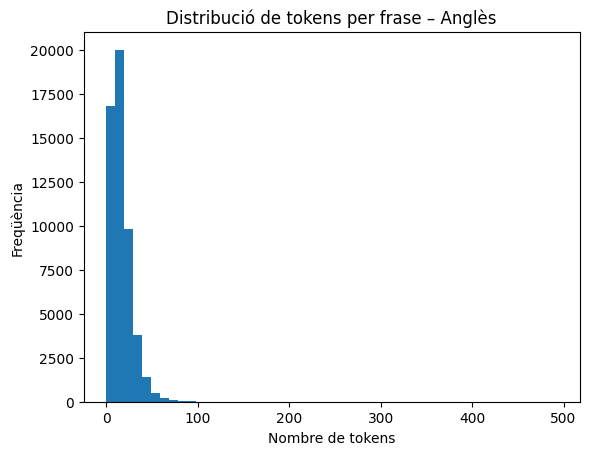

In [ ]:
import matplotlib.pyplot as plt

#############################################
# SOLUCIÓ                                  #
#############################################

# Visualitzem les dades (idioma origen)
df['len_en'] = df['ENGLISH_norm'].str.split().map(len)

plt.figure()
plt.hist(df['len_en'], bins=50)
plt.title('Distribució de tokens per frase – Anglès')
plt.xlabel('Nombre de tokens')
plt.ylabel('Freqüència')
plt.show()

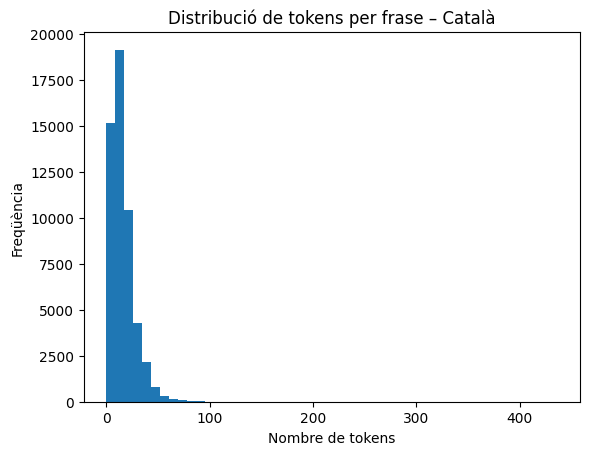

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

# Visualitzem les dades (idioma destí)
df['len_ca'] = df['CATALAN_norm'].str.split().map(len)

plt.figure()
plt.hist(df['len_ca'], bins=50)
plt.title('Distribució de tokens per frase – Català')
plt.xlabel('Nombre de tokens')
plt.ylabel('Freqüència')
plt.show()

Per a la definició dels models, necessitem instal·lar *keras* i *tensorflow*.

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

**d. Calculem el vocabulari tant el de l'idioma origen, com el de l'idioma destí, i imprimim el nombre de paraules**.

*Resultat esperat:* Es visualitzaran dos nombres, el de paraules del vocabulari de l'idioma origen i el de destí, després d'haver aplicat el preprocessament i la tokenització.

In [ ]:
#############################################
# SOLUCIÓ                                  #
#############################################

eng_tokens = df['ENGLISH_norm'].str.split().explode()
cat_tokens = df['CATALAN_norm'].str.split().explode()

eng_vocab = set(eng_tokens.dropna())
cat_vocab = set(cat_tokens.dropna())

eng_vocab_size = len(eng_vocab)
cat_vocab_size = len(cat_vocab)

print(f"eng_vocab_size: {eng_vocab_size}")
print(f"cat_vocab_size: {cat_vocab_size}")

eng_vocab_size: 29845
cat_vocab_size: 45215


**e. Separem els conjunts d'entrenament per idioma i els codifiquem.**

En aquest pas, se separen les dades en dos conjunts: un per a entrenament (*train*) i l'altre per a prova (*test*), utilitzant una divisió del 80% per a entrenament i 20% per a prova.

*Sortida esperada:* tres primeres files del dataset d'entrenament *train*.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#############################################
# SOLUCIÓ                                  #
#############################################

eng_strs = df['ENGLISH_norm'].tolist()
cat_strs = df['CATALAN_norm'].tolist()

eng_train, eng_test, cat_train, cat_test = train_test_split(
    eng_strs,
    cat_strs,
    test_size=0.2,
    random_state=12
)

train_pairs = np.array(list(zip(eng_train, cat_train)), dtype=object)
test_pairs  = np.array(list(zip(eng_test, cat_test)), dtype=object)

print(train_pairs[:3])

[['and i discovered that telomeres consisted of special segments of noncoding dna right at the very ends of chromosomes'
  'vaig descobrir que aquests telòmers estan formats per segments especials dadn no codificat just al final dels cromosomes']
 ['volunteer 0 7 9 0 4 4' 'home 079044']
 ['we are just not doing enough' 'simplement no hi estem fent prou']]


**f. Definir i aplicar una funció per a codificar les seqüències**

En aquest pas, els dos conjunts de dades creats en el punt anterior,  seran codificats usant **tokenització** i un procés de **padding** per a assegurar que totes les seqüències d'un mateix idioma tinguin la mateixa longitud.

**Important:** Per a dur a terme un primer experiment, *depenent de la capacitat de processament disponible de cadascú*, se suggereix ajustar el valor del paràmetre **longitud de seqüència*, *fins a trobar el valor més alt possible que permeti entrenar el model encoder-decoder en un temps acceptable.*

El paràmetre **longitud de seqüència** té un impacte important en l'entrenament del model. Un valor alt permet al model capturar més context de les frases, la qual cosa és crucial per a traduir correctament oracions complexes; no obstant això, si la longitud és massa curta, el model pot truncar frases importants, perdent informació clau.

Uso de memoria y eficiencia computacional:

Majors longituds requereixen més memòria, ja que el model defineix matrius més grans per a representar les seqüències. Mentre que longituds curtes són més eficients en termes de recursos, però poden sacrificar precisió si les oracions reals excedeixen aquest límit amb freqüència.

Finalment, en traducció automàtica, les longituds de les seqüències en l'idioma origen i destí no sempre han de ser iguals (per exemple, una oració en anglès pot ser més curta que la seva equivalent en alemany).

Considerant tot l'anterior, si es disposa d'infraestructura amb GPU, se suggereix iniciar amb un valor máximo de 12 (o proper) i mínim de 4. A la cel·la de codi que segueix, es proposa iniciar amb un valor intermedi de 8, però aquest valor pot ser ajustat.

Si durant l'entrenament, es produeixen problemes (per limitació d'infraestructura), es podrà tornar a aquest pas per a fixar el valor mínim de 4 per a la longitud de seqüència de tots dos idiomes (tot i que els resultats de la traducció no seran de qualitat)

**Sortida esperada:** Mida de cada arxiu i mostra de les tres primeres seqüències codificades de l'arxiu d'entrenament.

In [ ]:
# ----------------------
# Depenent de la infraestructura del sistema,
# la longitud de seqüència es pot iniciar amb un valor de 8.
max_text_length = 12
# ----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#############################################
# SOLUCIÓN                                  #
#############################################

eng_tokenizer = Tokenizer()
cat_tokenizer = Tokenizer()

eng_tokenizer.fit_on_texts(eng_train)
cat_tokenizer.fit_on_texts(cat_train)

train_eng_seq = eng_tokenizer.texts_to_sequences(eng_train)
test_eng_seq  = eng_tokenizer.texts_to_sequences(eng_test)
train_cat_seq = cat_tokenizer.texts_to_sequences(cat_train)
test_cat_seq  = cat_tokenizer.texts_to_sequences(cat_test)

trainX = pad_sequences(train_eng_seq, maxlen=max_text_length, padding='post')
testX  = pad_sequences(test_eng_seq,  maxlen=max_text_length, padding='post')
trainY = pad_sequences(train_cat_seq, maxlen=max_text_length, padding='post')
testY  = pad_sequences(test_cat_seq,  maxlen=max_text_length, padding='post')

print("trainX.shape, testX.shape:", trainX.shape, testX.shape)
print("Primeres 3 seqüències codificades (trainX):\n", trainX[:3])

trainX.shape, testX.shape: (42156, 12) (10540, 12)
Primeres 3 seqüències codificades (trainX):
 [[  909  9458     4 15688   828    98    34     1    60   998     4  3526]
 [ 2029  7061  8103  6335  7061  2373  2373     0     0     0     0     0]
 [   11    16    47    30   146   248     0     0     0     0     0     0]]


### 1.1.2 Definició del model encoder-decoder i entrenament (2 punts)

**a. Definim el model *encoder-decoder* basant-nos en el notebook vist a l'assignatura**, i l'instanciem amb una capa d'embedding per a les frases de la **llengua origen** i la dimensió de la última capa com la del vocabulario de la **llengua destí**.

**Important:** Per a la definició del model, considerar els següents paràmetres i valors referencials:

* Com a quantitat de **units** treballar, inicialment, amb el valor de 100. El nombre d'unitats o cel·les de memòria de cada capa LSTM defineix la dimensionalitat de l'espai intern en el que la LSTM processa i representa la informació al llarg del temps; és a dir, és la mida del vector de l'estat ocult *hidden state* i de l'estat de cel·la *cell state* que la LSTN manté per a capturar patrons i dependències de les seqüències d'entrada.

 A major nombre de *units*, augmenta la capacitat del model per a modelar relacions complexes i dependè cies a llarg termini en el text, la qual cosa és clau per a la traducció automàtica, on el context pot comprendre vàries paraules o frases. No obstant això, un valor alt incrementa el nombre de paràmetres i, per tant, requerirà més memòria i temps de càlcul; a més, creix el risc de sobreajustament si les dades d'entrenament no són suficients.

 Per tant, treballarem amb un valor inicial de 100 tot i que l'ideal seria usar un valor superior.

* Longitud dels vectors d'embeddings *embedding_vec_length*: establir-lo en 200; aquest és un valor referencial que podría ser ajustat segons la mida del vocabulario, la complexitat de l'idioma i els recursos disponibles. Més endavant, *exercici 1.1.3* es demanar variar aquest valor.

**Resultat esperat:** s'haurà instanciat un modelo encoder-decoder. Aquest model està dissenyat per a processar i traduir textos de l'**idioma origen** a l'**idioma destí** utilitzant capes d'embedding i LSTM.

*Sortida esperada*: Utilitzar el mètode *mt_model.summary()* per a visualitzar l'estructura i configuració del model, incloent el nombre de paràmetres i la disposició de les capes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, Dense

#############################################
# SOLUCIÓ                                   #
#############################################

# Definim el model encoder-decoder

embedding_vec_length = 200 # Valor referencial
units = 100 # Valor referencial

# Tamany del vocabulari anglès i català
vocab_size_eng = len(eng_tokenizer.word_index) + 1
vocab_size_cat = len(cat_tokenizer.word_index) + 1

seq_model = Sequential(name="mt_seq_model")

# Embedding de l'idioma origen
seq_model.add(Embedding(input_dim=vocab_size_eng,
                        output_dim=embedding_vec_length,
                        input_length=max_text_length,
                        name="embedding"))

# Encoder LSTM
seq_model.add(LSTM(units, name="lstm"))

# Repetim l'estat ocult tantes vegades com longitud de seqüència
seq_model.add(RepeatVector(max_text_length, name="repeat_vector"))

# Decoder LSTM
seq_model.add(LSTM(units,
                   return_sequences=True,
                   name="lstm_1"))

# Dense
seq_model.add(Dense(vocab_size_cat,
                    activation="softmax",
                    name="dense"))

seq_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1748503557.172342      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748503557.173107      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "mt_seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**b. Compilem el model**

**Resultat esperat:** el model compilat i llest per a ser entrenat. S'utilitzarà l'optimitzador *RMSprop* amb una tasa d'aprenentatge de *0.001* i la funció de pèrdua *sparse_categorical_crossentropy*.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

#############################################
# SOLUCIÓ                                   #
#############################################

# Compilem el model
seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

seq_model.summary()

Model: "mt_seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**c. Entrenem i guardem el model.**

**Important:** El model pot trigar hores si es disposa de CPU, molt menys amb GPU. Colab permet l'ús de GPU en general, si no se'n fa un ús intensiu i continuat. Per tant, habilitar només la GPU quan es necessiti per a entrenar i predir. Deshabilitar-la (i per tant reiniciar l'entorn) per a executar les cel·les no necessàries per a entrenar.

* Per tant, per a provar el funcionament, recomanem llençar l'entrenament **només amb una època** i comprovar-ne el funcionament. Un cop tenim clar que el sistema funciona, incrementar el valor (per exemple a 50 o 100, depenent de com evoluciona el model amb cada *epoch*)

* Si durant l'entrenament, Colab no pot carregar el model en memòria, recomanem disminuir el valor de **longitud de paraula** a 4 i el nombre de **units** a 128, d'aquesta manera es podrà completar el procés, tot i que, probablement, els resultats no seran bons.

* Revisar el `Notebook d'Exemple`, en el que es proporcionen pautes i guies per a dur un millor control de les execucions quan s'han de realitzar reinicis de sessió o s'exhaureix la memòria.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

# Entrenem i guardem el model
epochs = 100
batch_size = 64

history = seq_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)


model_path = "mt_seq_model.keras"
seq_model.save(model_path, save_format="keras")
print(f"Model guardat a: {model_path}")

Epoch 1/100


I0000 00:00:1748346717.214721     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


659/659 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.1822 - loss: 7.3088 - val_accuracy: 0.1952 - val_loss: 6.2247
Epoch 2/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.1812 - loss: 6.4246 - val_accuracy: 0.1952 - val_loss: 6.2143
Epoch 3/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.1857 - loss: 6.3816 - val_accuracy: 0.1952 - val_loss: 6.1634
Epoch 4/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.1809 - loss: 6.3120 - val_accuracy: 0.2033 - val_loss: 5.9344
Epoch 5/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.1957 - loss: 6.1153 - val_accuracy: 0.2119 - val_loss: 5.9169
Epoch 6/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.2039 - loss: 6.0477 - val_accuracy: 0.2182 - val_loss: 5.8386
Epoch 7/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.2072 - loss: 6.0187 - val_accuracy: 0.2157 - val_loss: 5.8402
Epoch 8/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.2079 - loss: 6.0176 - val_

**d. Generar prediccions.**

Un cop entrenat el model, aplicar el mètode *predict()* a l'arxiu de test per a obtenir les prediccions.

**Suggeriment:** Revisar el `Notebook d'exemple` en el que es proporciona una pauta per a treballar amb un subconjunt de l'arxiu de tex en cas de tenir limitacions durante el procés de predicció.

In [ ]:
def load_ta_model (model_path):
    """Loads a pre-trained model from a specified file path.

    This function attempts to load a saved model, including its architecture,
    weights, and optimizer state, from the given file path.

    Args:
        model_path (str): The file path where the saved model file is located.

    Returns:
        object: The loaded 'Keras model' object if the file exists and the underlying
                `load_model` function executes successfully.
        None: If the file specified by `model_path` does not exist or if the
              `load_model` function raises an exception during loading.
    """
    print(f"Loading model from: {model_path}")
    mt_model = None
    if not os.path.exists(model_path):
        print(f"ERROR: Model file not found at {model_path}.")
    else:
        try:
            # Load the model, includes architecture, weigths and optimizer state
            mt_model = load_model(model_path)
            print("Model loaded successfully!")
        except Exception as e:
            print(f"ERROR: Unable to load model from {model_path}. Error: {e}")
    return mt_model

In [ ]:
import os

# Secció Load model
#
# PER A CARREGAR UN MODEL JA ENTRENAT:
#
# 1. Canviar only_load_model a True
# 2. Revisar, i en el seu cas modificar, el 'model_path' del model a recuperar
# 2. Executar aquesta cel·la
#
# Per seguretat, restaurar only_load_model a False
#

only_load_model = True     # Change when necessary

from keras.models import load_model

if only_load_model:
    model_path = '/kaggle/input/mt_seq_model/keras/pr2-textos-model-1/1/mt_seq_model.keras'
    mt_model = load_ta_model(model_path)

Loading model from: /kaggle/input/mt_seq_model/keras/pr2-textos-model-1/1/mt_seq_model.keras
Model loaded successfully!


In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

# Apliquem el modelo
# Error de memòria, nomes 10 primeres entrades
n_samples = 10

X_sample       = testX[:n_samples]
expected_small = cat_test[:n_samples]

pred_probs = mt_model.predict(X_sample, batch_size=1)
pred_ids   = np.argmax(pred_probs, axis=-1)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

I0000 00:00:1748426227.781812      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


**e. Visualització de resultats.**

Visualitzem els resultats de les prediccions amb els valors esperats.

**Resultat esperat:** prediccions traduïdes de les primeres 10 entrades del conjunt de prova. Aquestes prediccions es mostraran amb els textos esperats a efectes de comprovar la bondat de la predicció.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

def decode_sequence(seq):
    return ' '.join(
        cat_tokenizer.index_word.get(idx, '')
        for idx in seq
        if idx != 0
    ).strip()

decoded_preds = [decode_sequence(seq) for seq in pred_ids]

df_results = pd.DataFrame({
    'actual':    expected_small,
    'predicted': decoded_preds
})

df_results

,actual,predicted
0,és la cosa més poderosa que posseeixes,aquesta és la més que que
1,realment són tan diferents,així són són
2,aquest no és un exercici secundari,aquí és és la diferència diferència
3,en la meva segona químio la meva mare es va posar molt malalta i vaig anar a visitarla,amb amb de de i i em em li li la la
4,o potser és una persona normal i corrent com ara tu o jo,o una o o o no sóc una una
5,ell no va utilitzar mai més el meu sobrenom,el mai mai més més
6,rialles igual que el bisolvon no és una cura universal per totes les malalties leducació tampoc ho és per tots els pecats racials dels eua,una una una a per les de de de de de de
7,que quan éreu un embrió,el del cervell cos cos cos mateix un que un un un
8,i mantenen estrets vincles socials,els els estan estan un
9,explosions,el del nit i i 4


f. **Pregunta d'anàlisi:** Depenent dels resultats obtinguts en la predicció (valors reals vs. valors generats), per què creus que no són bons i com creus que poden obtenir-se millors resultats?

**Resposta a la pregunta:**

Els resultats són dolents perquè el model s'ha entrenat completament de zero amb encoders personalitzats, embeddings de dimensió 200, o un número d'unitats de 100. D'aquesta manera la capacitat i el coneixement inicial eren molt limitats tot i entrenar 100 èpoques. Per obtenir millors traduccions, caldria utilitzar transfer learning amb embeddings o encoders preentrenats, augmentar la capacitat o fer servir un altre arquitectura de model. A la feina m'han donat molt bons resultats els transformers.







### 1.1.3 Experimentació amb diferentss resultats (1,5 punts)

En aquest apartat podríem analitzar com afecta a la qualitat de la traducció la variació de diferents paràmetres del model com ara:
* longitud d'embeddings (*embedding_vec_length*),
* longitud de seqüència (*max_text_length*),
* número de units (*units*),
* batch size,
* epochs,
* ...

No obstant això, degut a que no sempre ens trobarem amb GPUs lliures, aquí ens limitarem a experimentar amb els paràmetres:
* *embedding_vec_length* i
* *max_text_length*.

**Important:** durant les execucions, depenent del model i del consum de memòria actual, la predicció pot cancel·lar si s'exhaureix la memòria disponible. En cas de cancel·lació, recarregar el model des de local (veue apartat 1.1.2.2 del `Notebook d'exemple`) i predir només un subconjunt de l'arxiu de test (tot i que en aquest cas no seran vàlides les magnituds de medició de qualitat del sistema)  

A més, suggerim que després de cada entrenament es realitzi una còpia del model entrenat i s'emmagatzemi en local (*'model/...'*) per a, en cas de cancel·lació, no haver de realitzar de nou l'entrenament, associant al nom de la còpia els paràmetres amb els que ha estat entrenat.


**a. Experimentar amb el valor de longitud de embedding** (*embedding_vec_length*)

Analitzar com un increment en la mida dels vectors de embedding afecta al rendiment d'un model de traducció automàtica de **l'idioma origen** a **l'idioma destí**.

**Resultat esperat:** S'imprimirà el resultat que mostri el rendiment del model creat per a diferents mides d'embeddings (inicialment s'ha treballat amb 200, també es podria experimentar amb valors com ara 50 i 300). Cada resultat constarà de la mida de l'embedding seguit d'un **score** que n'indiqui l'efectivitat del model calculat amb *model.evaluate()*.



In [ ]:
# Possibles longituds de vectors a provar:
embedding_size = 50
epochs = 25  # incrementar aquest valor si existeix disponibilitat de GPUs.
batch_size=128

#############################################
# SOLUCIÓN                                  #
#############################################

seq_model = Sequential(name="mt_seq_emb50")
seq_model.add(Embedding(input_dim=vocab_size_eng,
                        output_dim=embedding_size,
                        input_length=max_text_length,
                        name="embedding_50"))
seq_model.add(LSTM(units, name="lstm_50"))
seq_model.add(RepeatVector(max_text_length, name="repeat_vector_50"))
seq_model.add(LSTM(units,
                   return_sequences=True,
                   name="lstm_1_50"))
seq_model.add(Dense(vocab_size_cat,
                    activation="softmax",
                    name="dense_50"))

seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)

loss, acc = seq_model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print(f"Results (embedding=50):  loss={loss:.4f}, accuracy={acc:.4f}")

model_path = "mt_seq_model_emb50.keras"
seq_model.save(model_path, save_format="keras")
print(f"Model guardat a: {model_path}")

Epoch 1/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.1815 - loss: 7.8000 - val_accuracy: 0.1952 - val_loss: 6.2309
Epoch 2/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 163ms/step - accuracy: 0.1830 - loss: 6.4203 - val_accuracy: 0.1952 - val_loss: 6.1931
Epoch 3/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 165ms/step - accuracy: 0.1849 - loss: 6.3710 - val_accuracy: 0.1952 - val_loss: 6.1776
Epoch 4/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 164ms/step - accuracy: 0.1845 - loss: 6.3492 - val_accuracy: 0.1952 - val_loss: 6.0842
Epoch 5/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 164ms/step - accuracy: 0.1839 - loss: 6.2455 - val_accuracy: 0.2020 - val_loss: 5.9263
Epoch 6/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 164ms/step - accuracy: 0.1998 - loss: 6.0863 - val_accuracy: 0.2098 - val_loss: 5.8684
Epoch 7/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 164ms/step - accuracy: 0.2041 - loss: 6.0364 - val_accuracy: 0.2129 - val_loss: 5.8589
Epoch 8/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 54s 164ms/step - accuracy: 0.2054 - loss: 6

In [ ]:
# Possibles longituds de vectors a provar:
embedding_size = 300
epochs = 25  # incrementar aquest valor si existeix disponibilitat de GPUs.
batch_size=128

#############################################
# SOLUCIÓN                                  #
#############################################

seq_model = Sequential(name="mt_seq_emb300")
seq_model.add(Embedding(input_dim=vocab_size_eng,
                        output_dim=embedding_size,
                        input_length=max_text_length,
                        name="embedding_300"))
seq_model.add(LSTM(units, name="lstm_300"))
seq_model.add(RepeatVector(max_text_length, name="repeat_vector_300"))
seq_model.add(LSTM(units,
                   return_sequences=True,
                   name="lstm_1_300"))
seq_model.add(Dense(vocab_size_cat,
                    activation="softmax",
                    name="dense_300"))

seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)

loss, acc = seq_model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print(f"Results (embedding=300):  loss={loss:.4f}, accuracy={acc:.4f}")

model_path = "mt_seq_model_emb300.keras"
seq_model.save(model_path, save_format="keras")
print(f"Model guardat a: {model_path}")

Epoch 1/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.1825 - loss: 7.7596 - val_accuracy: 0.1952 - val_loss: 6.2280
Epoch 2/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1854 - loss: 6.3969 - val_accuracy: 0.1952 - val_loss: 6.2050
Epoch 3/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 167ms/step - accuracy: 0.1833 - loss: 6.3884 - val_accuracy: 0.1952 - val_loss: 6.1811
Epoch 4/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1860 - loss: 6.3549 - val_accuracy: 0.1952 - val_loss: 6.1607
Epoch 5/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1836 - loss: 6.3325 - val_accuracy: 0.1952 - val_loss: 6.0419
Epoch 6/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1864 - loss: 6.1816 - val_accuracy: 0.2090 - val_loss: 5.9085
Epoch 7/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.2016 - loss: 6.0698 - val_accuracy: 0.2175 - val_loss: 5.8619
Epoch 8/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.2044 - loss: 6

**b. Exercici opcional: Experimentar amb el valor de longitud de seqüència** (*max_text_length*)

Analitzar com un increment/reducció de la longitud de seqüència impacta en la qualitat del model de traducció.

**Resultat esperat:** S'imprimirà el resultat que mostri el rendiment del model per a una longitud de seqüència superior o inferior a l'establert (per exemple, si es va inicialitzar el model preliminar amb el valor de 8, aquí es podria provar amb 4 i 12). El resultat constarà del valor de la longitud, i del score que indica l'efectivitat del model calculat amb *model.evaluate()*

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import RMSprop
import os

#############################################
# SOLUCIÓ                                   #
#############################################
# Possibles valors a provar:
embedding_size   = 200
max_text_length  = 4
units            = 100
epochs           = 25
batch_size       = 128
model_dir        = "models"

os.makedirs(model_dir, exist_ok=True)

trainX = pad_sequences(train_eng_seq, maxlen=max_text_length, padding='post')
testX  = pad_sequences(test_eng_seq,  maxlen=max_text_length, padding='post')
trainY = pad_sequences(train_cat_seq, maxlen=max_text_length, padding='post')
testY  = pad_sequences(test_cat_seq,  maxlen=max_text_length, padding='post')

seq_model = Sequential(name="mt_seq_emb200_len4")
seq_model.add(Embedding(input_dim=vocab_size_eng,
                        output_dim=embedding_size,
                        input_length=max_text_length,
                        name="embedding_200"))
seq_model.add(LSTM(units, name="lstm_200"))
seq_model.add(RepeatVector(max_text_length, name="repeat_vector_200"))
seq_model.add(LSTM(units, return_sequences=True, name="lstm_1_200"))
seq_model.add(Dense(vocab_size_cat,
                    activation="softmax",
                    name="dense_200"))

seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq_model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)

loss, acc = seq_model.evaluate(testX, testY,
                               batch_size=batch_size,
                               verbose=0)
print(f"Results (embedding=200, maxlen=4): loss={loss:.4f}, accuracy={acc:.4f}")

save_path = os.path.join(model_dir, "mt_seq_emb200_len4.keras")
seq_model.save(save_path, save_format="keras")
print(f"Model desat a: {save_path}")

Epoch 1/25


I0000 00:00:1748504401.055483     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


330/330 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.0338 - loss: 9.4038 - val_accuracy: 0.0388 - val_loss: 7.4571
Epoch 2/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.0371 - loss: 7.5892 - val_accuracy: 0.0450 - val_loss: 7.4087
Epoch 3/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0371 - loss: 7.5483 - val_accuracy: 0.0388 - val_loss: 7.3930
Epoch 4/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0399 - loss: 7.5216 - val_accuracy: 0.0388 - val_loss: 7.3664
Epoch 5/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0415 - loss: 7.5123 - val_accuracy: 0.0302 - val_loss: 7.3556
Epoch 6/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0445 - loss: 7.4991 - val_accuracy: 0.0495 - val_loss: 7.3443
Epoch 7/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0454 - loss: 7.4695 - val_accuracy: 0.0517 - val_loss: 7.3373
Epoch 8/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.0455 - loss: 7.4809 - val_accurac

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import RMSprop
import os

#############################################
# SOLUCIÓ                                   #
#############################################
# Possibles valors a provar:
embedding_size   = 200
max_text_length  = 12
units            = 100
epochs           = 25
batch_size       = 128
model_dir        = "models"

os.makedirs(model_dir, exist_ok=True)

trainX = pad_sequences(train_eng_seq, maxlen=max_text_length, padding='post')
testX  = pad_sequences(test_eng_seq,  maxlen=max_text_length, padding='post')
trainY = pad_sequences(train_cat_seq, maxlen=max_text_length, padding='post')
testY  = pad_sequences(test_cat_seq,  maxlen=max_text_length, padding='post')

seq_model = Sequential(name="mt_seq_emb200_len12")
seq_model.add(Embedding(input_dim=vocab_size_eng,
                        output_dim=embedding_size,
                        input_length=max_text_length,
                        name="embedding_200"))
seq_model.add(LSTM(units, name="lstm_200"))
seq_model.add(RepeatVector(max_text_length, name="repeat_vector_200"))
seq_model.add(LSTM(units, return_sequences=True, name="lstm_1_200"))
seq_model.add(Dense(vocab_size_cat,
                    activation="softmax",
                    name="dense_200"))

seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq_model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)

loss, acc = seq_model.evaluate(testX, testY,
                               batch_size=batch_size,
                               verbose=0)
print(f"Results (embedding=200, maxlen=4): loss={loss:.4f}, accuracy={acc:.4f}")

save_path = os.path.join(model_dir, "mt_seq_emb200_len12.keras")
seq_model.save(save_path, save_format="keras")
print(f"Model desat a: {save_path}")

Epoch 1/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 60s 171ms/step - accuracy: 0.1777 - loss: 7.7813 - val_accuracy: 0.1952 - val_loss: 6.2253
Epoch 2/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1824 - loss: 6.4183 - val_accuracy: 0.1952 - val_loss: 6.1980
Epoch 3/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 167ms/step - accuracy: 0.1835 - loss: 6.3830 - val_accuracy: 0.1952 - val_loss: 6.1804
Epoch 4/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1866 - loss: 6.3487 - val_accuracy: 0.1952 - val_loss: 6.1755
Epoch 5/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1825 - loss: 6.3545 - val_accuracy: 0.1952 - val_loss: 6.1053
Epoch 6/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.1840 - loss: 6.2506 - val_accuracy: 0.1952 - val_loss: 5.9480
Epoch 7/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 167ms/step - accuracy: 0.1987 - loss: 6.0918 - val_accuracy: 0.2165 - val_loss: 5.8797
Epoch 8/25
330/330 ━━━━━━━━━━━━━━━━━━━━ 55s 167ms/step - accuracy: 0.2044 - loss: 6

Segons els resultats obtinguts en aquest exercici 1.1.3, discutir en el *document d'Anàlisi* les diferències trobades.

## 1.2 TA amb Embeddings preentrenats (2,5 punts)


En aquest apartat repetirem l'exercici anterior carregant a la capa d'embedding els pesos d'un model `GloVe` entrenat per a l'anglès.

Aquest apartat 1.2 pot executar-se en diferents sessions de treball; no depèn de les seccions anteriors a excepció de:
* Executar l'apartat *0. Connexió amb Drive* (o les cel·les que s'hagin definit per a altres entorns no Colab).
* Executar la cel·la de preparació de dades (secció 1.1.1)



### 1.2.1 Càrrega de `GloVe`

**a. Començarem carregant el model `Glove`per a l'anglès.**

Podeu utilitzar [`'glove.42B.300d.txt'`](https://www.kaggle.com/datasets/yutanakamura/glove42b300dtxt).

**Sortida esperada:** mida de l'objecte carregat, utilitzar *len()*.

In [ ]:
import numpy as np

embeddings_index = {}

glove="glove.42B.300d.txt"
my_path_pra2 = "/kaggle/input/glove-42b-300d-pr2"
glove_path = os.path.join(my_path_pra2, glove)    #'my_path_pra2' definida en sección 0


print(f"Attempting to open glove file: {glove_path}")
try:
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        print(f"Successfully opened glove file: {glove}")
except Exception as e:
    print(f"ERROR: File not found at opening file: {e}")

print(len(embeddings_index))

Attempting to open glove file: /kaggle/input/glove-42b-300d-pr2/glove.42B.300d.txt
Successfully opened glove file: glove.42B.300d.txt
1917494


### 1.2.2 Definició del model

**a. Construir la matriu d'embeddings.**

A continuació, hem de construir la matriu d'embeddings.

Per a no carregar tot el vocabulari del model, filtrarem només aquelles entrades presents en el vocabulari del tokenitzador que utilitzarem.

A més, inclourem a la matriu de vectors els índexs de les entrades, paraules, que no constin en el model `glove` carregat. Aquests vectors se solen inicialitzar amb zeros o amb el resultat d'una distribució N (0, 1).

**Sortida esperada:** Imprimir els 3 primers elements de la matriu d'embeddings.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

embedding_dim   = 300
vocab_size_eng  = len(eng_tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size_eng, embedding_dim))

for word, idx in eng_tokenizer.word_index.items():
    if idx < vocab_size_eng:
        vector = embeddings_index.get(word)
        if vector is not None:
            embedding_matrix[idx] = vector
        else:
            embedding_matrix[idx] = np.random.normal(loc=0.0, scale=1.0, size=embedding_dim)

print("Primeres 3 files de la matriu d'embeddings:")
print(embedding_matrix[:3])

Primeres 3 files de la matriu d'embeddings:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+0

**b. Inicialitzar la capa d'embeddings.**

Per a inicialitzar una capa d'embeddings amb pesos predefinits s'utilitza l'argument `weights`. A més, como no volem que es modifiquin els pesos, marquem l'argument `trainable` com a `False`.

Seguint amb el nostre exemple, faríem:

In [ ]:
# ----------------------
# Depenent de la infraestructura del sistema,
# la longitud de seqüència es pot iniciar amb un valor de 8.
max_text_length = 8
# ----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#############################################
# SOLUCIÓN                                  #
#############################################

eng_tokenizer = Tokenizer()
cat_tokenizer = Tokenizer()

eng_tokenizer.fit_on_texts(eng_train)
cat_tokenizer.fit_on_texts(cat_train)

train_eng_seq = eng_tokenizer.texts_to_sequences(eng_train)
test_eng_seq  = eng_tokenizer.texts_to_sequences(eng_test)
train_cat_seq = cat_tokenizer.texts_to_sequences(cat_train)
test_cat_seq  = cat_tokenizer.texts_to_sequences(cat_test)

trainX = pad_sequences(train_eng_seq, maxlen=max_text_length, padding='post')
testX  = pad_sequences(test_eng_seq,  maxlen=max_text_length, padding='post')
trainY = pad_sequences(train_cat_seq, maxlen=max_text_length, padding='post')
testY  = pad_sequences(test_cat_seq,  maxlen=max_text_length, padding='post')

print("trainX.shape, testX.shape:", trainX.shape, testX.shape)
print("Primeres 3 seqüències codificades (trainX):\n", trainX[:3])

trainX.shape, testX.shape: (42156, 8) (10540, 8)
Primeres 3 seqüències codificades (trainX):
 [[ 828   98   34    1   60  998    4 3526]
 [2029 7061 8103 6335 7061 2373 2373    0]
 [  11   16   47   30  146  248    0    0]]


In [ ]:
from keras.layers import Embedding

# Es podria experimentar amb diferents models, variant paràmetres com ara 'embedding_vec_length' i 'max_text_length'
# A l'entrenar nous models, recordar:
# - O bé modificar el nom del model en el paràmetre callback (variable 'model_path') de la classe 'fit'
# - O bé (opció recomanada), un cop finalitza l'entrenament, reanomenar el model emmagatzemat segons 'model_path'.
#

embedding_vec_length = 200 # Ajustar si fa falta
max_text_length = 8 # Ajustar si fa falta

#############################################
# SOLUCIÓ                                   #
#############################################

seq_model = Sequential(name="mt_seq_glove_emb300")
seq_model.add(Embedding(
    input_dim=vocab_size_eng,
    output_dim=embedding_dim,
    input_length=max_text_length,
    weights=[embedding_matrix],
    trainable=False,
    name="embedding_glove"
))

**c. Definició del nou model considerant els pesos del model preentrenat.**

 Implementa i entrena de nou un model de traducció automàtica de **l'idioma origen** a  **l'idioma destí**; aquest cop carregant els pesos de la capa embedding a partir del model `Glove` preentrenat en anglès i disponible a `glove.42B.300d.txt`.

In [ ]:
#############################################
# SOLUCIÓ                                  #
#############################################

# ... una cop definit embedding_layer, definim el model

seq_model.add(LSTM(units, name="lstm_enc"))
seq_model.add(RepeatVector(max_text_length, name="repeat_vector"))
seq_model.add(LSTM(units, return_sequences=True, name="lstm_dec"))
seq_model.add(Dense(vocab_size_cat, activation="softmax", name="dense_out"))

seq_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

seq_model.summary()

Model: "mt_seq_glove_emb300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_glove (Embedding)          │ ?                           │       8,115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_enc (LSTM)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_dec (LSTM)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_out (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,115,300 (30.96 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,115,300 (30.96 MB)

### 1.2.3 Entrenament del model

**Entrenar i guardar el model.**

Tot i que aquest entrenament és més 'lleuger' que l'anterior, recomanem l'ús de GPU si és viable.

**Suggeriments:**

- Provar amb diferents valors *batch_size*. En el notebook d'exemple es va treballar bé amb el valor de 128.

- Observar com evoluciona el model després de cada *epoch*; en caso de no observar millores, es pot disminuir el seu valor. En el notebook d'exemple es va baixar el valor a 50 perquè a partir de l'epoch 32 no es va observar millora.

- Revisar el `Notebook d'Exemple`, secció 1.2.3.2, en el que proporcionem pautes i guies per a dur un millor control de les execucions quan s'ha de reiniciar la sessió o s'exhaureix la memòria.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

# entrenem i guardem el model

epochs = 40
batch_size = 128

history = seq_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=epochs,
    batch_size=batch_size
)

loss, acc = seq_model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
print(f"Results (Glove emb={embedding_dim}):  loss={loss:.4f}, accuracy={acc:.4f}")

model_path = f"mt_seq_glove_emb{embedding_dim}.keras"
seq_model.save(model_path, save_format="keras")
print(f"Model guardat a: {model_path}")

Epoch 1/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.0903 - loss: 8.1076 - val_accuracy: 0.1055 - val_loss: 6.8093
Epoch 2/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 140ms/step - accuracy: 0.0954 - loss: 6.9830 - val_accuracy: 0.1055 - val_loss: 6.7850
Epoch 3/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 47s 141ms/step - accuracy: 0.0972 - loss: 6.9588 - val_accuracy: 0.1055 - val_loss: 6.7731
Epoch 4/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.0958 - loss: 6.9483 - val_accuracy: 0.1055 - val_loss: 6.7731
Epoch 5/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.0972 - loss: 6.9401 - val_accuracy: 0.1055 - val_loss: 6.7608
Epoch 6/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.0971 - loss: 6.9282 - val_accuracy: 0.1055 - val_loss: 6.7539
Epoch 7/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.0970 - loss: 6.9182 - val_accuracy: 0.1055 - val_loss: 6.7424
Epoch 8/40
330/330 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.0977 - loss: 6

### 1.2.4 Generar prediccions

En aquest pas, aplicar el model per a generar les prediccions utilitzant l'arxiu de test.

**Resultat esperat:**

- Visualitzar la taula de resultats: frase en l'idioma origen, text traduït real vs. text traduït generat.

**Suggeriment:** Si durant l'execució, cancel·la la predicció per exhaurir-se la memòria disponible, recarregar el model des de local (veure apartat 1.2.3.2 del `Notebook d'Exemple`) i predir només per a un subconjunt de l'arxiu de test (tot i que en aquest cas no seran vàlides les magnituds de medició de qualitat del sistema).   

In [ ]:
# Apliquem el model i visualitzem resultats

# Si degut a la configuració escollida no es pot realitzar la predicció per problemes de memòria
# amb l'arxiu sencer de testX, utilitzar-ne un subconjunt.

reducir_test = True    # Canvia a True per a només les primeres 100 frases
if reducir_test:
    testX_to_pred = testX[:100]
    eng_to_pred   = eng_test[:100]
    cat_to_pred   = cat_test[:100]
else:
    testX_to_pred = testX
    eng_to_pred   = eng_test
    cat_to_pred   = cat_test


#############################################
# SOLUCIÓ                                   #
#############################################

pred_probs = seq_model.predict(testX_to_pred, batch_size=1)
pred_ids   = np.argmax(pred_probs, axis=-1)

index_to_word = {idx: word for word, idx in cat_tokenizer.word_index.items()}
index_to_word[0] = ""

def decode_sequence(seq):
    return " ".join(
        index_to_word.get(idx, "") for idx in seq if idx != 0
    ).strip()

decoded_preds = [decode_sequence(seq) for seq in pred_ids]

df_results = pd.DataFrame({
    'English (ORIG)':        eng_to_pred,
    'Catalan (REAL)':        cat_to_pred,
    'Catalan (PREDICTED)':   decoded_preds
})

df_results

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,English (ORIG),Catalan (REAL),Catalan (PREDICTED)
0,its the most powerful thing you own,és la cosa més poderosa que posseeixes,és és és és la la la la
1,are they so different,realment són tan diferents,i són són són
2,this isnt a second class exercise,aquest no és un exercici secundari,és és és en a de
3,in my second chemo my mother got very sick and i went to see her,en la meva segona químio la meva mare es va posar molt malalta i vaig anar a visitarla,i i i i i a a meva
4,or perhaps an ordinary person like you or me,o potser és una persona normal i corrent com ara tu o jo,un una que o o o o cosa
...,...,...,...
95,despite the presence of plaques and tangles and brain shrinkage what appeared to be unquestionable alzheimers the nuns who had belonged to these brains showed no signs of having the disease while they were alive,tot i la presència de plaques cabdells i reducció del cervell que semblava indubtablement alzheimer les monges no havien mostrat senyals dalzheimer en vida,la la les les que que que que
96,i dont know if id try that but its available,no sé si la provaria però és disponible,que que que que que que no
97,they look upon their body as a form of transport for their heads,veuen el seu cos com una forma de transport pels seus caps no,un a a a a la la la
98,so anyone walking by can pick up a piece of chalk reflect on their life and share their personal aspirations in public space,així qualsevol que hi passi pot agafar un tros de guix reflexionar sobre la seva vida i compartir les aspiracions personals en un espai públic,i i la la la la la vida


# 2 Detecció de NER i NEL (3 punts)



En aquesta segona part, ens enfocarem en la detección de entidades anomenades (`NER`).

A més, experimentarem amb 'Named Entity Linking' (`NEL`) per a buscar entitats enllaçades a una base de coneixement (KB), en aquest cas *Wikidata*. Identificarem els enllaços a Wikidata de certes entitats d'un text utilitzant la API de Wikidata.

**Aquest apartat pot executar-se aïlladament**, no depèn de l'apartat anterior, a excepció d'executar l'apartat *0. Connexió amb Drive* (o les cel·les que s'hagin definit per a altres entorns no Colab).

In [ ]:
# Accedir a Colab myDrive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os

# Establir el directori arrel

# Canviar aquest directori arell si és necessari però seguint l'estructura de directoris descrita
my_path_pra2 = "/content/drive/MyDrive/UOC/20242_ADT/PRA2"

if os.path.exists(my_path_pra2):
    try:
        os.chdir(my_path_pra2)
        print(f"Directorio arrel canviat a: '{os.getcwd()}'")
    except Exception as e:
        print(f"Error canviant al directori: '{my_path_pra2}'. Error: {e}")
else:
    print(f"Directori '{my_path_pra2}' no existeix")

Directorio arrel canviat a: '/content/drive/MyDrive/UOC/20242_ADT/PRA2'


## 2.1 Detecció de NER (2 punts)

En aquesta primera subsecció, detectarem entitats anomenades (`NER`), utilitzant tant spaCy com transformers.


### 2.1.1 Detecció d'entitats anomenades (NER) utilitzant spaCy.

Per a detectar NER utilitzarem el model `en_core_web_sm` de spaCy.

**a. Instal·lar llibreries i model de llenguatge a utilitzar.**

In [ ]:
!pip install spacy numpy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.0 MB/s eta 0:00:00:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**`Important:`**

Si la descàrrega de *'en_core_web_sm'* es realitza des de Google Colab y, després de la descàrrega, es mostra el missatge 'Restart to reload dependencies', executar l'opció de menú 'Runtime>>>Restart session'. A continuació tornar a executar la secció 0 d'aquest notebook.

**b. Definir funcions per a imprimir els resultats de la detecció.**

In [ ]:
def get_tokens_to_print(model, text):
  """Print tokens of the text and its relevant attributes.

    Parameters:
      model (spaCy model): spaCy model used for tokenization
      text (str):  text to transform in a spaCy doc class.

    Returns: ---
  """
  doc = model(text)
  print (f"The text:\n\n{get_text_to_print(text)}\n\nwas converted in a spaCy object: {type(doc)}\n")
  print (f"Token-based analysis. Each token is a spaCy object: {type(doc[0])}\n")

  # We obtain rows to print: headers and content
  rows  = []
  # head_align: List of tuples. Each tuple: heather and its alignment when printing
  head_align  = [('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'), ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'),
                 ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')]
  head, align = list(zip(*head_align))
  rows.append(head)                           # Header
  rows.append(['='*len(i) for i in head])     # Underline headers
  for tok in doc:
    rows.append([tok.text, tok.lemma_, tok.head.text, str(tok.i), str(tok.idx), str(tok.idx+len(tok)-1), tok.pos_,
                 tok.tag_, str(spacy.explain(tok.tag_))[:20], tok.ent_type_, tok.dep_, str(spacy.explain(tok.dep_))[:20]])

  # Width of each column: the witdh of the longest element
  columns       = zip(*rows)
  column_widths = [max(len(i) for i in col) for col in columns]

  # Print the files with alignment
  for row in rows:
    print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(0, len(row))])

In [ ]:
def get_text_to_print(text):
  """Format given text.

    Parameters:
      text (str): text to print

    Returns:
      str: text formatted in 100 character lines with an initial line numbering the characters
  """
  line_length = 100
  line_poss   = "     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100"
  text        = text.replace("\n", " ")     # In order to avoid that the \n character produces a line change.
  text        = text.replace("\r", " ")     # In wikipedia texts we have detected the character '\r' that, if interpreted, may induce some printing problems.
  text_format = "\n".join([ f"{i//line_length:<5}{text[i:i+line_length]}"  for i in range(0, len(text), line_length) ])
  return line_poss + "\n" + text_format + "\n" + line_poss

**c. Carregar el model `en_core_web_sm`**

**Resultat esperat**: Codi per a la càrrega del model.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

import spacy

nlp = spacy.load("en_core_web_sm")

**d. Convertir un text en objecte `Doc` de spaCy.**

Per a realitzar la detecció d'entitats anomenades, proposar un text en anglès que mencioni a entitats de diferent tipus.

**Sortida Esperada**: Visualitzar els resultats d'analitzar el text proposat a nivell de cada POS.

**Suggeriment:** Per a la visualització es pot utilitzar la funció *get_tokens_to_print()*, prèviament creada, o *displacy.render()* de spaCy.

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

import spacy

text = (
    "Last Friday, Spider-Man crashed Apple's WWDC keynote in San Francisco, California to challenge Justin Bieber to a dance-off."
)

get_tokens_to_print(nlp, text)

The text:

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100
0    Last Friday, Spider-Man crashed Apple's WWDC keynote in San Francisco, California to challenge Justi
1    n Bieber to a dance-off.
     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>

Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>

Token        Lemma        Syntactic parent   #Tok   Chr_Start   Chr_End   POS     TAG    TAG meaning:           ENT      DEP        DEP meaning:          
=====        =====        ================   ====   =========   =======   ===     ===    ============           ===      ===        ============          
Last         last         Friday                0           0         3   ADJ     JJ     adjective (English),   DATE     amod       adjectival modifier   
Friday       Friday   

### 2.1.2 Entrenar un nou model de NER amb el corpus escollit de detecció d'entitats.

**a. Convertir el corpus escollit al 'format spaCy'.**

*Suggeriment:* Si el corpus es gran i l'entrenament triga massa, pots generar una versió més reduïda de tots els arxius del corpus escollit (train, dev y test). La reducció es podria fer del 25%.

Recuerda que spaCy conté funcions que permeten convertir formats, com ara *conll*, al format compilat que necessita el mòdul de train de spaCy.

**Sortida esperada:** Codi per a convertir el corpus training (train.txt) i el de validació (valid.txt), del format origen a format spaCy.

In [ ]:
import os
import random
import spacy
from spacy.tokens import Doc, DocBin

def reduir_corpus(orig_path: str, reduit_path: str, percentatge: float = 0.25):
    with open(orig_path, "r", encoding="utf-8") as fin, \
         open(reduit_path, "w", encoding="utf-8") as fout:
        for linia in fin:
            if linia.strip() == "":
                fout.write("\n")
                continue
            if random.random() < percentatge:
                fout.write(linia)


def convert_conll_to_spacy(conll_path: str, output_spacy_path: str):
    nlp = spacy.blank("en")
    doc_bin = DocBin()

    with open(conll_path, "r", encoding="utf-8") as f:
        tokens = []
        iob_tags = []

        for linia in f:
            linia = linia.rstrip("\n")
            if linia == "":
                if tokens:
                    words = [tok for tok in tokens]
                    spaces = [True] * (len(words) - 1) + [False]
                    doc = Doc(nlp.vocab, words=words, spaces=spaces)

                    ents = []
                    start_token_idx = None
                    current_label = None

                    for idx, tag in enumerate(iob_tags):
                        if tag == "O":
                            if current_label is not None and start_token_idx is not None:
                                span = doc[start_token_idx:idx]
                                span.label_ = current_label
                                ents.append(span)
                                start_token_idx = None
                                current_label = None
                            continue

                        prefix, label = tag.split("-", 1)
                        if prefix == "B":
                            if current_label is not None and start_token_idx is not None:
                                span = doc[start_token_idx:idx]
                                span.label_ = current_label
                                ents.append(span)
                            # Comencem la nova entitat
                            start_token_idx = idx
                            current_label = label

                        elif prefix == "I":
                            continue

                        else:
                            if current_label is not None and start_token_idx is not None:
                                span = doc[start_token_idx:idx]
                                span.label_ = current_label
                                ents.append(span)
                                start_token_idx = None
                                current_label = None

                    if current_label is not None and start_token_idx is not None:
                        span = doc[start_token_idx : len(iob_tags)]
                        span.label_ = current_label
                        ents.append(span)

                    doc.ents = ents
                    doc_bin.add(doc)

                    tokens = []
                    iob_tags = []
                continue

            parts = linia.split()
            word = parts[0]
            iob_tag = parts[-1]
            tokens.append(word)
            iob_tags.append(iob_tag)

        if tokens:
            words = [tok for tok in tokens]
            spaces = [True] * (len(words) - 1) + [False]
            doc = Doc(nlp.vocab, words=words, spaces=spaces)

            ents = []
            start_token_idx = None
            current_label = None

            for idx, tag in enumerate(iob_tags):
                if tag == "O":
                    if current_label is not None and start_token_idx is not None:
                        span = doc[start_token_idx:idx]
                        span.label_ = current_label
                        ents.append(span)
                        start_token_idx = None
                        current_label = None
                    continue

                prefix, label = tag.split("-", 1)
                if prefix == "B":
                    if current_label is not None and start_token_idx is not None:
                        span = doc[start_token_idx:idx]
                        span.label_ = current_label
                        ents.append(span)
                    start_token_idx = idx
                    current_label = label
                elif prefix == "I":
                    continue
                else:
                    if current_label is not None and start_token_idx is not None:
                        span = doc[start_token_idx:idx]
                        span.label_ = current_label
                        ents.append(span)
                        start_token_idx = None
                        current_label = None

            if current_label is not None and start_token_idx is not None:
                span = doc[start_token_idx : len(iob_tags)]
                span.label_ = current_label
                ents.append(span)

            doc.ents = ents
            doc_bin.add(doc)

    os.makedirs(os.path.dirname(output_spacy_path), exist_ok=True)
    doc_bin.to_disk(output_spacy_path)
    print(f"Generat fitxer .spacy a: {output_spacy_path}")


input_train = "dataset/train.txt"
input_valid = "dataset/valid.txt"

train_reduit = "dataset/train_reduit.txt"
valid_reduit = "dataset/valid_reduit.txt"

output_dir = "spacy_v2"
os.makedirs(output_dir, exist_ok=True)

reduir_corpus(input_train, train_reduit, percentatge=0.25)
reduir_corpus(input_valid, valid_reduit, percentatge=0.25)

train_spacy_out = os.path.join(output_dir, "train_reduit.spacy")
valid_spacy_out = os.path.join(output_dir, "valid_reduit.spacy")

convert_conll_to_spacy(train_reduit, train_spacy_out)
convert_conll_to_spacy(valid_reduit, valid_spacy_out)

Generat fitxer .spacy a: spacy_v2/train_reduit.spacy
Generat fitxer .spacy a: spacy_v2/valid_reduit.spacy


**b. Descarregar el model `en_core_web_trf`**.

In [ ]:
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.9/237.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 30.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Important:**

A Google Colab, si després de la descàrrega del model `en_core_web_trf` s'obté el missatge 'Restart to reload dependencies', haurà d'executar-se l'opció de menú 'Runtime>>>Restart session'. A continuació, per a major seguretat, tornar a executar la secció 0 d'aquest notebook.

In [ ]:
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.8.7) =================
ℹ spaCy installation: /usr/local/lib/python3.11/dist-packages/spacy

NAME              SPACY            VERSION                            
en_core_web_trf   >=3.8.0,<3.9.0   3.8.0   ✔
en_core_web_sm    >=3.8.0,<3.9.0   3.8.0   ✔



In [ ]:
import spacy
print (f"Spacy version installed: {spacy.__version__}")

Spacy version installed: 3.8.7


**c. Verificar si es pot utilitzar GPU**

Si aquest notebook s'està executant en una GPU, al paràmetre 'gpu-id' se li assignarà 0. Amb aquest canvi, SpaCy utilitzarà la GPU i s'accelerarà el temps d'entrenament.

In [ ]:
import torch
if torch.cuda.is_available():
    gpu_id = 0    # Use the first available GPU
    print(f"Using GPU {gpu_id}")
else:
    gpu_id = -1   # Use CPU
    print("Using CPU")

Using GPU 0


**d. Entrenar el model `en_core_web_trf` utilitzant la funció train de spaCy.**


SpaCy realitza l'entrenament del model d'acord amb els paràmetres de l'arxiu de configuración 'config.cfg'. Una descripció de les seccions d'aquesta configuració la pots trobar a: https://spacy.io/usage/training#config; descriu algun canvi que realitzaries si creus que pots millorar l'entrenament.

A més, considera que a l'arxiu 'config.cfg' no es determina un nombre prefixat d'*epochs* (veure sección [training] de 'config.cfg'). El criteri per a finalitzar el determinen els paràmetres *max_steps* (20000) i *patience* (1600). Aquests paràmetres determinen que l'entrenament finalitzarà si es compleix una de les condicions:
* quan s'hagin processat 20000 'batches', o bé
* quan, després de 1600 'batches' processats, no hi ha hagut millora en el model.

**`Interrupció del procés`**

Per restriccions de temps de procés (o per no consumir les *compute unit* de les que disposem a Google Colab), si s'observa que transcorregudes diverses iteracions (per exemple a partir de la tercera) el model ha anat millorant (columna SCORE) y té un valor superior a 0.9, interrompre manualment el procés. El 'best model' fins a aquesta iteració s'emmagatzemarà al path '{my_path_pra2}/NER/output_ner/model-best'. Aquest model és el que s'utilitzarà per a validar o predir

In [ ]:
# Entrenament del model

!python -m spacy train \
    /kaggle/input/config/config.cfg \
    --output /kaggle/working/output_ner/ \
    --paths.train /kaggle/working/spacy_v2/train_reduit.spacy \
    --paths.dev   /kaggle/working/spacy_v2/valid_reduit.spacy \
    --gpu-id 0

ℹ Saving to output directory: /kaggle/working/output_ner
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2025-06-03 10:11:08,002] [INFO] Set up nlp object from config
[2025-06-03 10:11:08,022] [INFO] Pipeline: ['transformer', 'ner']
[2025-06-03 10:11:08,023] [INFO] Resuming training for: ['ner', 'transformer']
[2025-06-03 10:11:08,027] [INFO] Created vocabulary
[2025-06-03 10:11:11,813] [WARNING] [W112] The model specified to use for initial vectors (en_core_web_trf) has no vectors. This is almost certainly a mistake.
[2025-06-03 10:11:11,815] [INFO] Added vectors: en_core_web_trf
[2025-06-03 10:11:11,818] [INFO] Finished initializing nlp object
[2025-06-03 10:11:11,818] [INFO] Initialized pipeline components: []
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['transformer', 'ner']
ℹ Initial learn rate: 0.0
E    #       LOSS TRANS...  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE

In [ ]:
# Entrenament del model 2

!python -m spacy train \
    config.cfg \
    --output output_ner/ \
    --paths.train spacy_v2/train_reduit.spacy \
    --paths.dev  spacy_v2/valid_reduit.spacy \
    --gpu-id 0

✔ Created output directory: output_ner
ℹ Saving to output directory: output_ner
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['transformer', 'ner']
ℹ Initial learn rate: 0.0
E    #       LOSS TRANS...  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  -------------  --------  ------  ------  ------  ------
  0       0         203.37    127.59    4.39    3.31    6.52    0.04
  2     200       14624.92  14732.90   50.12   56.32   45.15    0.50
  4     400        5388.42   7860.08   59.15   60.37   57.97    0.59
  6     600        3188.58   5098.04   75.12   75.46   74.77    0.75
  8     800        1755.09   2502.37   75.78   74.97   76.61    0.76
 10    1000        1260.49   1728.11   75.91   72.73   79.38    0.76
 12    1200         884.64   1059.08   76.48   73.78   79.38    0.76
 14    1400         744.59    866.69   76.

**e. Predicció d'un text d'exemple (inferència amb el model entrenat).**

Carregar el millor model entrenat i utilitzar-lo per a predir una frase d'exemple. Recordar que, si el model ja està entrenat y emmagatzemat en una carpeta local, és millor, a l'iniciar una nova sessió, recuperar la millor versió entrenada des de local.

**Resultat esperat:** visualitzar els resultats de la predicció.


In [ ]:
# Donat que s'ha instal·lat un model spacy-transformers, y tot i que per a les funcionalitats
# que s'utilitzen en aquest notebook no és necessari, podria ser que en alguna configuració
# spacy fos necessari instal·lar i importar la llibreria spacy_transformers:

!pip install spacy-transformers

import spacy_transformers

In [ ]:
import spacy_transformers

#############################################
# SOLUCIÓ                                   #
#############################################

import spacy

model_dir = "output_ner/model-best"
nlp = spacy.load(model_dir)

text_example = (
    "Last Friday, Spider-Man crashed Apple's WWDC keynote "
    "in San Francisco, California to challenge Justin Bieber to a dance-off."
)
get_tokens_to_print(nlp, text_example)

The text:

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100
0    Last Friday, Spider-Man crashed Apple's WWDC keynote in San Francisco, California to challenge Justi
1    n Bieber to a dance-off.
     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>

Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>

Token        Lemma   Syntactic parent   #Tok   Chr_Start   Chr_End   POS   TAG   TAG meaning:   ENT    DEP   DEP meaning:  
=====        =====   ================   ====   =========   =======   ===   ===   ============   ===    ===   ============  
Last                 Last                  0           0         3               None                        None          
Friday               Friday                1           5        10               None                        None  

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


**f. Avaluar els resultats obtinguts i calcular les mètriques.**

**Sortida Esperada**: Càlcul de les mètriques utilitzant les dades de prova.

**Important:** Abans del càlcul de les mètriques, no oblidar convertir el format de l'arxiu test.txt al 'format spaCy'.

In [ ]:
#Usar GPU si és possible:

import torch
if torch.cuda.is_available():
    gpu_id = 0    # Use the first available GPU
    print(f"Using GPU {gpu_id}")
else:
    gpu_id = -1   # Use CPU
    print("Using CPU")

Using GPU 0


In [ ]:
def get_tokens_to_print_from_doc(doc):
    print (f"Text del Doc:\n\n{get_text_to_print(doc.text)}\n\nDoc: {type(doc)}\n")
    print (f"Cada token és un objecte spaCy: {type(doc[0])}\n")

    rows = []
    head_align = [
        ('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'),
        ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'),
        ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')
    ]
    head, align = list(zip(*head_align))
    rows.append(head)
    rows.append(['='*len(h) for h in head])

    for tok in doc:
        rows.append([
            tok.text,
            tok.lemma_,
            tok.head.text,
            str(tok.i),
            str(tok.idx),
            str(tok.idx + len(tok) - 1),
            tok.pos_,
            tok.tag_,
            str(spacy.explain(tok.tag_))[:20],
            tok.ent_type_,
            tok.dep_,
            str(spacy.explain(tok.dep_))[:20]
        ])

    column_widths = [max(len(cell) for cell in column) for column in zip(*rows)]
    for row in rows:
        print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(len(row))])

In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

!python -m spacy evaluate output_ner/model-best spacy_v2/valid_reduit.spacy --gpu-id 0

ℹ Using GPU: 0

================================== Results ==================================

TOK     100.00
NER P   76.07 
NER R   77.96 
NER F   77.00 
SPEED   992   


=============================== NER (per type) ===============================

           P       R       F
ORG    70.70   68.31   69.48
PER    71.70   78.01   74.72
LOC    82.20   86.98   84.52
MISC   80.68   74.55   77.49



## 2.2 NEL (1 punt)

En aquesta secció, obtindrem els enllaços a Wikidata relacionats amb les entitats que s'obtenen utilitzant spaCy.

Es desenvoluparà una funció que, donat un text, obtingui automàticament les entitats i les relacionarà amb la corresponent entrada a Wikidata.
Per a implementar la solució, podeu usar, por exemple, la llibreria `wikidata.client`, o realitzar sol·licituds directes a la API, utilitzant la llibreria `requests`.

**Important:** En el `Notebook d'Exemple` es proporciona un text en català, és per això que es carrega el model `ca_core_news_sm`. Per a analitzar frases en castellà, canviar el model, per ejemplo, usar `es_core_news_sm`. A més, si s'utilitza `requests`, modificar l'idioma a la URL d'accés al EndPoint de WikiData.

**Sortida Esperada**: Llista de les entitats reconegudes en el text, amb la seva respectiva `URI`.


In [ ]:
nel_model = "ca_core_news_sm" # Model a usar, es pot canvar a "es_core_news_sm" per a processar frases en castellà.

!pip install wikidata
!python -m spacy download '{nel_model}'

  Using cached https://github.com/explosion/spacy-models/releases/download/ca_core_news_sm-3.8.0/ca_core_news_sm-3.8.0-py3-none-any.whl (19.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ca_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#############################################
# SOLUCIÓ                                   #
#############################################

import spacy
import requests

nlp = spacy.load("ca_core_news_sm")

def cercar_wikidata_català(entitat):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "search": entitat,
        "language": "ca",
        "format": "json",
        "limit": 1
    }
    try:
        resposta = requests.get(url, params=params, timeout=10)
        resposta.raise_for_status()
    except requests.RequestException:
        return "No trobada"

    dades = resposta.json()
    if "search" in dades and len(dades["search"]) > 0:
        qid = dades["search"][0]["id"]
        return f"https://www.wikidata.org/wiki/{qid}"
    else:
        return "No trobada"

def obtenir_entitats_wikidata(text):
    doc = nlp(text)
    resultats = []
    vistos = set()

    for ent in doc.ents:
        ent_text = ent.text.strip()
        ent_label = ent.label_
        clau = ent_text.lower()
        if clau in vistos:
            continue
        vistos.add(clau)

        uri = cercar_wikidata_català(ent_text)
        resultats.append((ent_text, ent_label, uri))

    return resultats

In [ ]:
    text_exemple = (
        "La Universitat Autònoma de Barcelona (UAB) és una de les principals universitats de Catalunya. "
        "El Parc Güell va ser dissenyat per Antoni Gaudí i es troba a Barcelona. "
        "La llengua catalana és cooficial a la Generalitat de Catalunya i a Andorra."
    )

    entitats_amb_uri = obtenir_entitats_wikidata(text_exemple)

    print("Entitats reconegudes i URI corresponents a Wikidata:\n")
    for ent_text, ent_label, uri in entitats_amb_uri:
        print(f"  • {ent_text:30s}  [{ent_label:>3s}]  →  {uri}")

Entitats reconegudes i URI corresponents a Wikidata:

  • Universitat Autònoma de Barcelona  [ORG]  →  https://www.wikidata.org/wiki/Q43452
  • UAB                             [ORG]  →  https://www.wikidata.org/wiki/Q469482
  • Catalunya                       [LOC]  →  https://www.wikidata.org/wiki/Q5705
  • Parc Güell                      [LOC]  →  https://www.wikidata.org/wiki/Q212867
  • Antoni Gaudí                    [PER]  →  https://www.wikidata.org/wiki/Q25328
  • Barcelona                       [LOC]  →  https://www.wikidata.org/wiki/Q1492
  • Generalitat de Catalunya        [ORG]  →  https://www.wikidata.org/wiki/Q8022
  • Andorra                         [LOC]  →  https://www.wikidata.org/wiki/Q228
